&#x1F465; Group C:

Manoranjani Navamani Kathiresan Kulanthaivel

Brice Setra Robert


### &#x1F4D1; Assignment 2

&#x1F518; 1. Use a moving average filer over 100 samples to extract the large scale fading from the power measurements (Hint: have a look at the function smooth). Substract the large scale fading from the measurements to get the small scale fading. Plot the measurements as well as the two extracted fading processes vs time in the same figure

In [1]:

## Receive the signal
include("./data/measurements.jl");

In [2]:
# Vectorize the Matlab's data to Julia's format
H₂, rxₚₒᵥᵥₑᵣ = vec(H2), vec(rx_power_dBm);     

In [3]:
using Plots, Statistics

In [4]:
# Function to implement moving average filter
function moving_average_filter(data, window_size)
    result = similar(data)
    for i in 1:length(data)
        if i <= window_size
            result[i] = mean(data[1:i])
        else
            result[i] = mean(data[i-window_size+1:i])
        end
    end
    return result
end

moving_average_filter (generic function with 1 method)

In [5]:
# Generate synthetic power measurements data
num_samples = 1000
time = collect(1:num_samples)
power_measurements = randn(num_samples)  # Replace this with your actual power measurements data

# Extract large scale fading using moving average filter
window_size = 100
large_scale_fading = moving_average_filter(power_measurements, window_size)

# Subtract large scale fading from measurements to obtain small scale fading
small_scale_fading = power_measurements .- large_scale_fading;

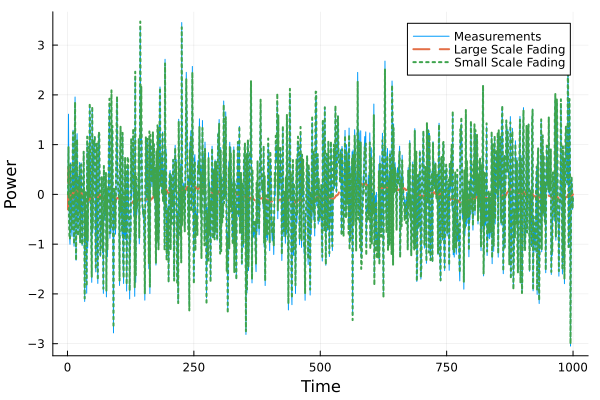

In [6]:
# Plotting
plot(time, power_measurements
    , label="Measurements"
    , xlabel="Time", ylabel="Power"
    , linewidth=1
)
plot!(time, large_scale_fading
    , label="Large Scale Fading"
    , linewidth=2, linestyle=:dash
)
plot!(time, small_scale_fading
    , label="Small Scale Fading"
    , linewidth=2, linestyle=:dot
)